# Análisis de Sentimientos en Reseñas de Alimentos de Amazon con IA: VADER y Roberta al Servicio de la Opinión del Consumidor

* Introducción:

    El análisis de sentimientos es una herramienta clave en el procesamiento de lenguaje natural (PLN), utilizada para extraer y entender las emociones detrás de los textos. En este proyecto, nos enfocamos en las reseñas de alimentos de Amazon, un recurso valioso para comprender la percepción de los consumidores sobre productos alimenticios. Utilizando modelos avanzados de PLN como VADER y Roberta, este análisis permite clasificar y evaluar los sentimientos expresados en las opiniones de los usuarios, diferenciando entre emociones positivas, negativas y neutras. El objetivo es ofrecer una visión profunda de cómo los consumidores perciben la calidad de los alimentos, brindando insights que pueden ser aprovechados por empresas para mejorar sus productos y estrategias de marketing.

✅Puedes descargar el dataset aquí: 👉👉 https://github.com/WLozanoH/Amazon-Food-Sentiment-Analysis/blob/main/Reviews.7z

## Paso 1: Carga de Datos y Fundamentos de NLTK

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
plt.style.use("ggplot")

import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
df = pd.read_csv('Reviews.csv')

In [3]:
print(df.shape)
# Se seleccionan las primeras 500 filas para hacer el análisis más manejable:
df=df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [4]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


## Análisis Exploratorio de Datos (EDA)

Se genera un gráfico para mostrar la distribución de las puntuaciones (Score) de las reseñas utilizando un gráfico de barras.

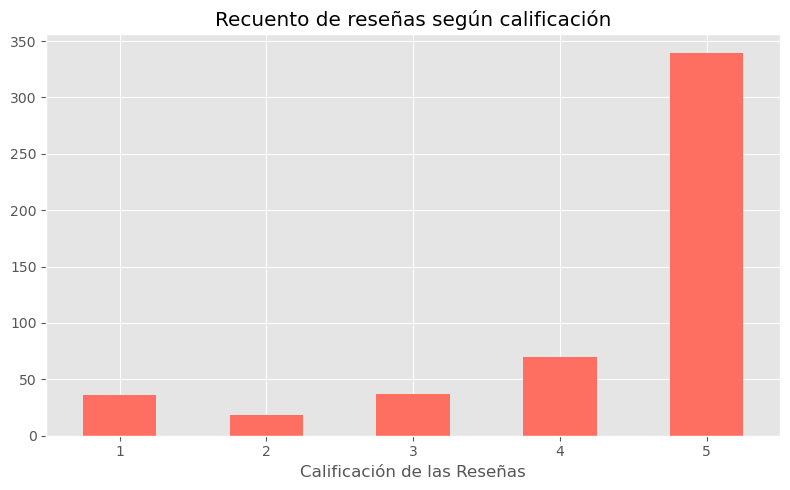

In [5]:
ax = (df['Score'].value_counts().sort_index().plot(
            kind='bar',  #Tipo de gráfico (barras)
            figsize=(8,5), # Tamaño de la figura
            title='Recuento de reseñas según calificación', # Título del gráfico
            color = '#FF6F61'   # Color personalizado para las barras
        ))
ax.set_xlabel('Calificación de las Reseñas')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  # Rotar las etiquetas del eje X

#Mostrar el gráfico
plt.tight_layout() # Ajustar el diseño para evitar que se corten etiquetas
plt.show() #Mostrar el gráfico
        

## Análisis básico con NLTK (Natural Language Toolkit)

In [6]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
# Descargar recursos necesarios para tokenización solo si no están presentes
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Tokenización

In [8]:
# La función nltk.word_tokenize() divide un texto en palabras individuales
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
# Descargar el modelo de etiquetado de partes del discurso solo si no está presente
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

* Etiquetado de Partes del Discurso (POS)

In [10]:
# El etiquetado POS (Part-of-Speech) asigna etiquetas gramaticales a cada palabra:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

* Etiquetas:

        DT: Determinante.
        RB: Adverbio.
        PRP$: Pronombre posesivo.
        ,: Coma.
        JJ: Adjetivo.
        NN: Sustantivo singular.
        VBZ: Verbo en tercera persona del singular (presente).
        .: Puntuación (como un signo de exclamación o punto).

In [11]:
# Descargar los recursos necesarios para reconocer entidades nombradas solo si no están presentes
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

* Reconocimiento de Entidades Nombradas (NER)

In [12]:
# Procesamiento de entidades nombradas con un control adecuado de impresión
entities = nltk.chunk.ne_chunk(tagged)

# Usar pprint para una visualización clara y ordenada
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Paso 2: Análisis de Sentimiento con VADER

"Utilizaremos el SentimentIntensityAnalyzer de NLTK para obtener los puntajes de sentimiento negativos, neutrales y positivos del texto.

* Este análisis se basa en el enfoque de "bag of words"(bolsa de palabras):

1. Se eliminan las palabras vacías (stop words).
2. Se asigna un puntaje a cada palabra, y luego estos puntajes se combinan para obtener un puntaje total."

In [13]:
# Descargar el léxico de VADER, que se utiliza con el analizador de sentimientos de NLTK.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer  #Esta clase de NLTK se utiliza para calcular el puntaje de sentimiento de un texto.
from tqdm.notebook import tqdm      #Para mostrar barras de progreso en los loops

# Inicializar el analizador de intensidad de sentimiento de NLTK
sia = SentimentIntensityAnalyzer()

1. Introducción a VADER

* VADER es un método basado en reglas y léxicos para análisis de sentimientos.

Calcula cuatro métricas:

    neg: Puntaje negativo.
    neu: Puntaje neutral.
    pos: Puntaje positivo.
    compound: Una puntuación combinada que resume el sentimiento general.

2. Aplicación a una muestra

Probar el analizador de sentimientos con algunos textos simples

In [15]:
# Probando...
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
# Probando...
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
# Probando con el ejemplo anterior 'example'
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [18]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

3. Análisis en lote

In [19]:
# Inicializar un diccionario para almacenar los resultados
resultados = {} 

# Iterar sobre cada fila del DataFrame 'df' con tqdm para mostrar el progreso
for i, row in tqdm(df.iterrows(), total=len(df), desc = 'Procesando Sentimientos'):
    # Extraer el texto de la columna 'Text' y el identificador de la fila
    texto = row['Text']
    Myid = row['Id']
    
    # Calcular el puntaje de sentimiento para el texto y almacenarlo en el diccionario
    resultados[Myid] = sia.polarity_scores(texto)
    
# Ver los resultados almacenados
#print(resultados)

Procesando Sentimientos:   0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
# Convertir el diccionario de resultados en un DataFrame
vaders = pd.DataFrame(resultados).T

# Renombrar la columna 'index' a 'Id'
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Unir el DataFrame de resultados de sentimiento con el DataFrame original 'df' usando 'Id' como clave

vaders = vaders.merge(df, how='left')

 # Mostrar las primeras filas del DataFrame 'vaders' con los puntajes de sentimiento y metadatos
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


4. Visualización

Se generan gráficos de barras para comparar los puntajes de VADER (pos, neu, neg, compound) según la puntuación de las reseñas (Score).

## Graficar los resultados de sentimiento obtenidos con VADER

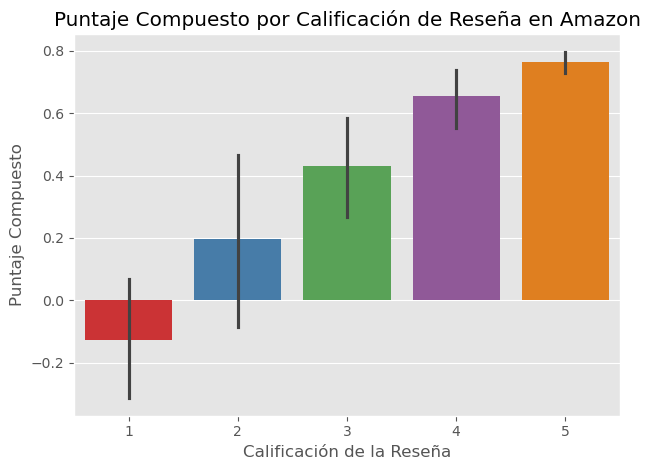

In [21]:
# Crear un gráfico de barras para visualizar el puntaje compuesto ('compound') por calificación de Amazon
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='Set1')

# Configurar el título y las etiquetas del gráfico
ax.set_title('Puntaje Compuesto por Calificación de Reseña en Amazon')
ax.set_xlabel('Calificación de la Reseña')
ax.set_ylabel('Puntaje Compuesto')

#Ajustamos el diseño del gráfico
plt.tight_layout()
#mostramos el gráfico
plt.show()

In [22]:
vaders.head(1)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


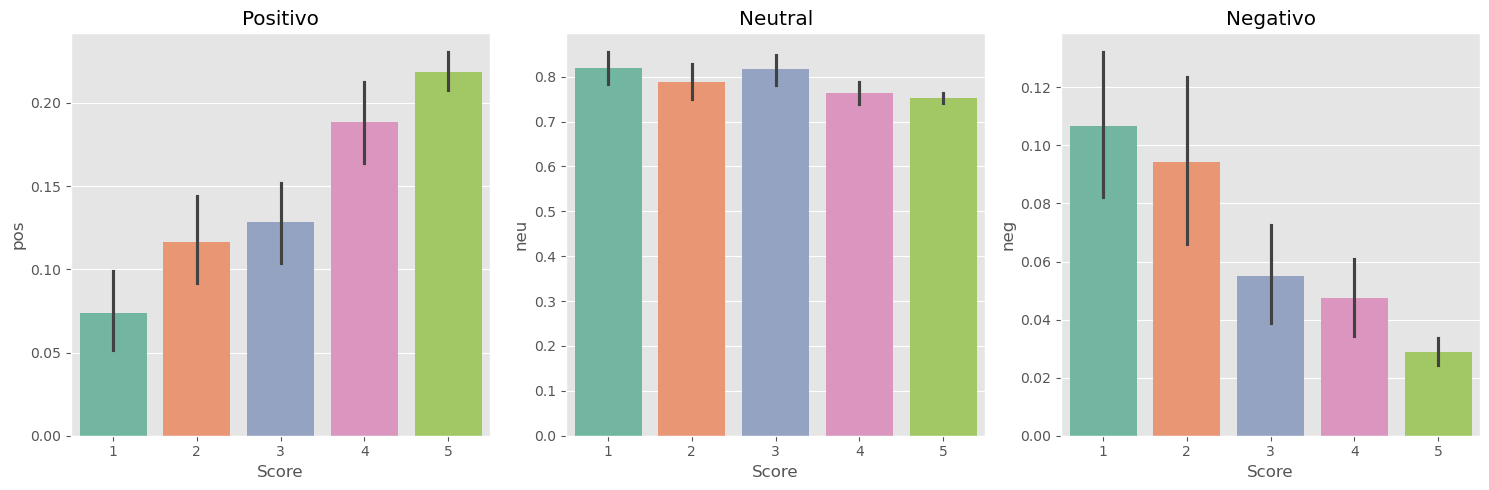

In [23]:
# Crear gráficos de barras para cada categoría de sentimiento
fig, axes = plt.subplots(1,3, figsize =(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axes[0], palette='Set2')
sns.barplot(data=vaders, x='Score', y='neu', ax=axes[1], palette='Set2')
sns.barplot(data=vaders, x='Score', y='neg', ax=axes[2], palette='Set2')

axes[0].set_title('Positivo')
axes[1].set_title('Neutral')
axes[2].set_title('Negativo')

# Ajustar el diseño para evitar el solapamiento de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Paso 3. Modelo Preentrenado Roberta

* Utiliza un modelo entrenado con una gran cantidad de texto.
* El modelo Transformer tiene en cuenta no solo las palabras individuales, sino también el contexto relacionado con otras palabras en la secuencia.

* Instalar las librerías necesarias en la terminal:

        !pip install transformers
        !pip install torch

In [24]:
# Importar el tokenizador de la librería transformers para convertir el texto en tokens.
from transformers import AutoTokenizer

# Importar el modelo preentrenado de clasificación de secuencias para análisis de sentimientos.
from transformers import AutoModelForSequenceClassification

# Importar la función softmax de scipy para normalizar los resultados y convertirlos en probabilidades.
from scipy.special import softmax


In [25]:
# Definir el nombre del modelo preentrenado que se usará para el análisis de sentimientos.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Cargar el tokenizador preentrenado asociado al modelo. Este convierte el texto en una secuencia de tokens que el modelo puede entender.
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Cargar el modelo preentrenado para clasificación de secuencias. Este modelo ya ha sido entrenado para realizar análisis de sentimientos.
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [26]:
# Mostrar el texto de 'example' usado anteriormente
print(example)
# Obtener los resultados de análisis de sentimientos utilizando el analizador VADER
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
# Ejecutar el modelo Roberta para el texto de 'example'
encoded_text = tokenizer(example, return_tensors= 'pt') # Tokenizamos el texto de entrada y lo preparamos para el modelo

# Obtener las predicciones del modelo Roberta
output = model(**encoded_text)

# Extraer las puntuaciones y aplicar la función softmax para convertirlas en probabilidades
scores = softmax(output[0][0].detach().numpy())

# Crear un diccionario con los resultados de las puntuaciones de cada categoría
scores_dict = {
    
    'roberta_neg': scores[0],   # Probabilidad de sentimiento negativo
    'roberta_neu': scores[1],   # Probabilidad de sentimiento neutral
    'roberta_pos': scores[2],   # Probabilidad de sentimiento positivo
    
}

# Imprimir los resultados
print(scores_dict)


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [28]:
def polarity_scores_roberta(example):
    # Tokenizar el texto de entrada y obtener las predicciones
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)

    # Aplicar softmax para obtener probabilidades y desconectar del grafo de cómputo
    scores = softmax(output[0][0].detach().numpy())

    # Crear el diccionario de resultados de polaridad
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

In [29]:
# Inicializar un diccionario para almacenar los resultados
resultados = {} 

# Iterar sobre cada fila del DataFrame 'df' con tqdm para mostrar el progreso
for i, row in tqdm(df.iterrows(), total=len(df), desc = 'Procesando Sentimientos'):
    try:
        # Extracción de texto y ID
        texto = row['Text']
        Myid = row['Id']
        # Análisis de sentimiento con Vader
        vader_result = sia.polarity_scores(texto)
        # Renombrar las claves de los resultados de Vader
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value     #Este bloque renombra las claves del diccionario vader_result para incluir el prefijo "vader_"
        # Análisis de sentimiento con RoBERTa
        roberta_result = polarity_scores_roberta(texto)
        # Combinar los resultados de Vader y RoBERTa
        both = {**vader_result_rename, **roberta_result}
        # Almacenar los resultados en el diccionario resultados
        resultados[Myid] = both   
    except RuntimeError:
        print(f'Broke for id {Myid}')

Procesando Sentimientos:   0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [30]:
# Convertir el diccionario de resultados en un DataFrame
results_df = pd.DataFrame(resultados).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})

# Unir los resultados con el DataFrame original
results_df = results_df.merge(df, how='left')


## Paso 4: Combinar y Comparar Resultados entre Modelos Vader y RoBERTa

In [31]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

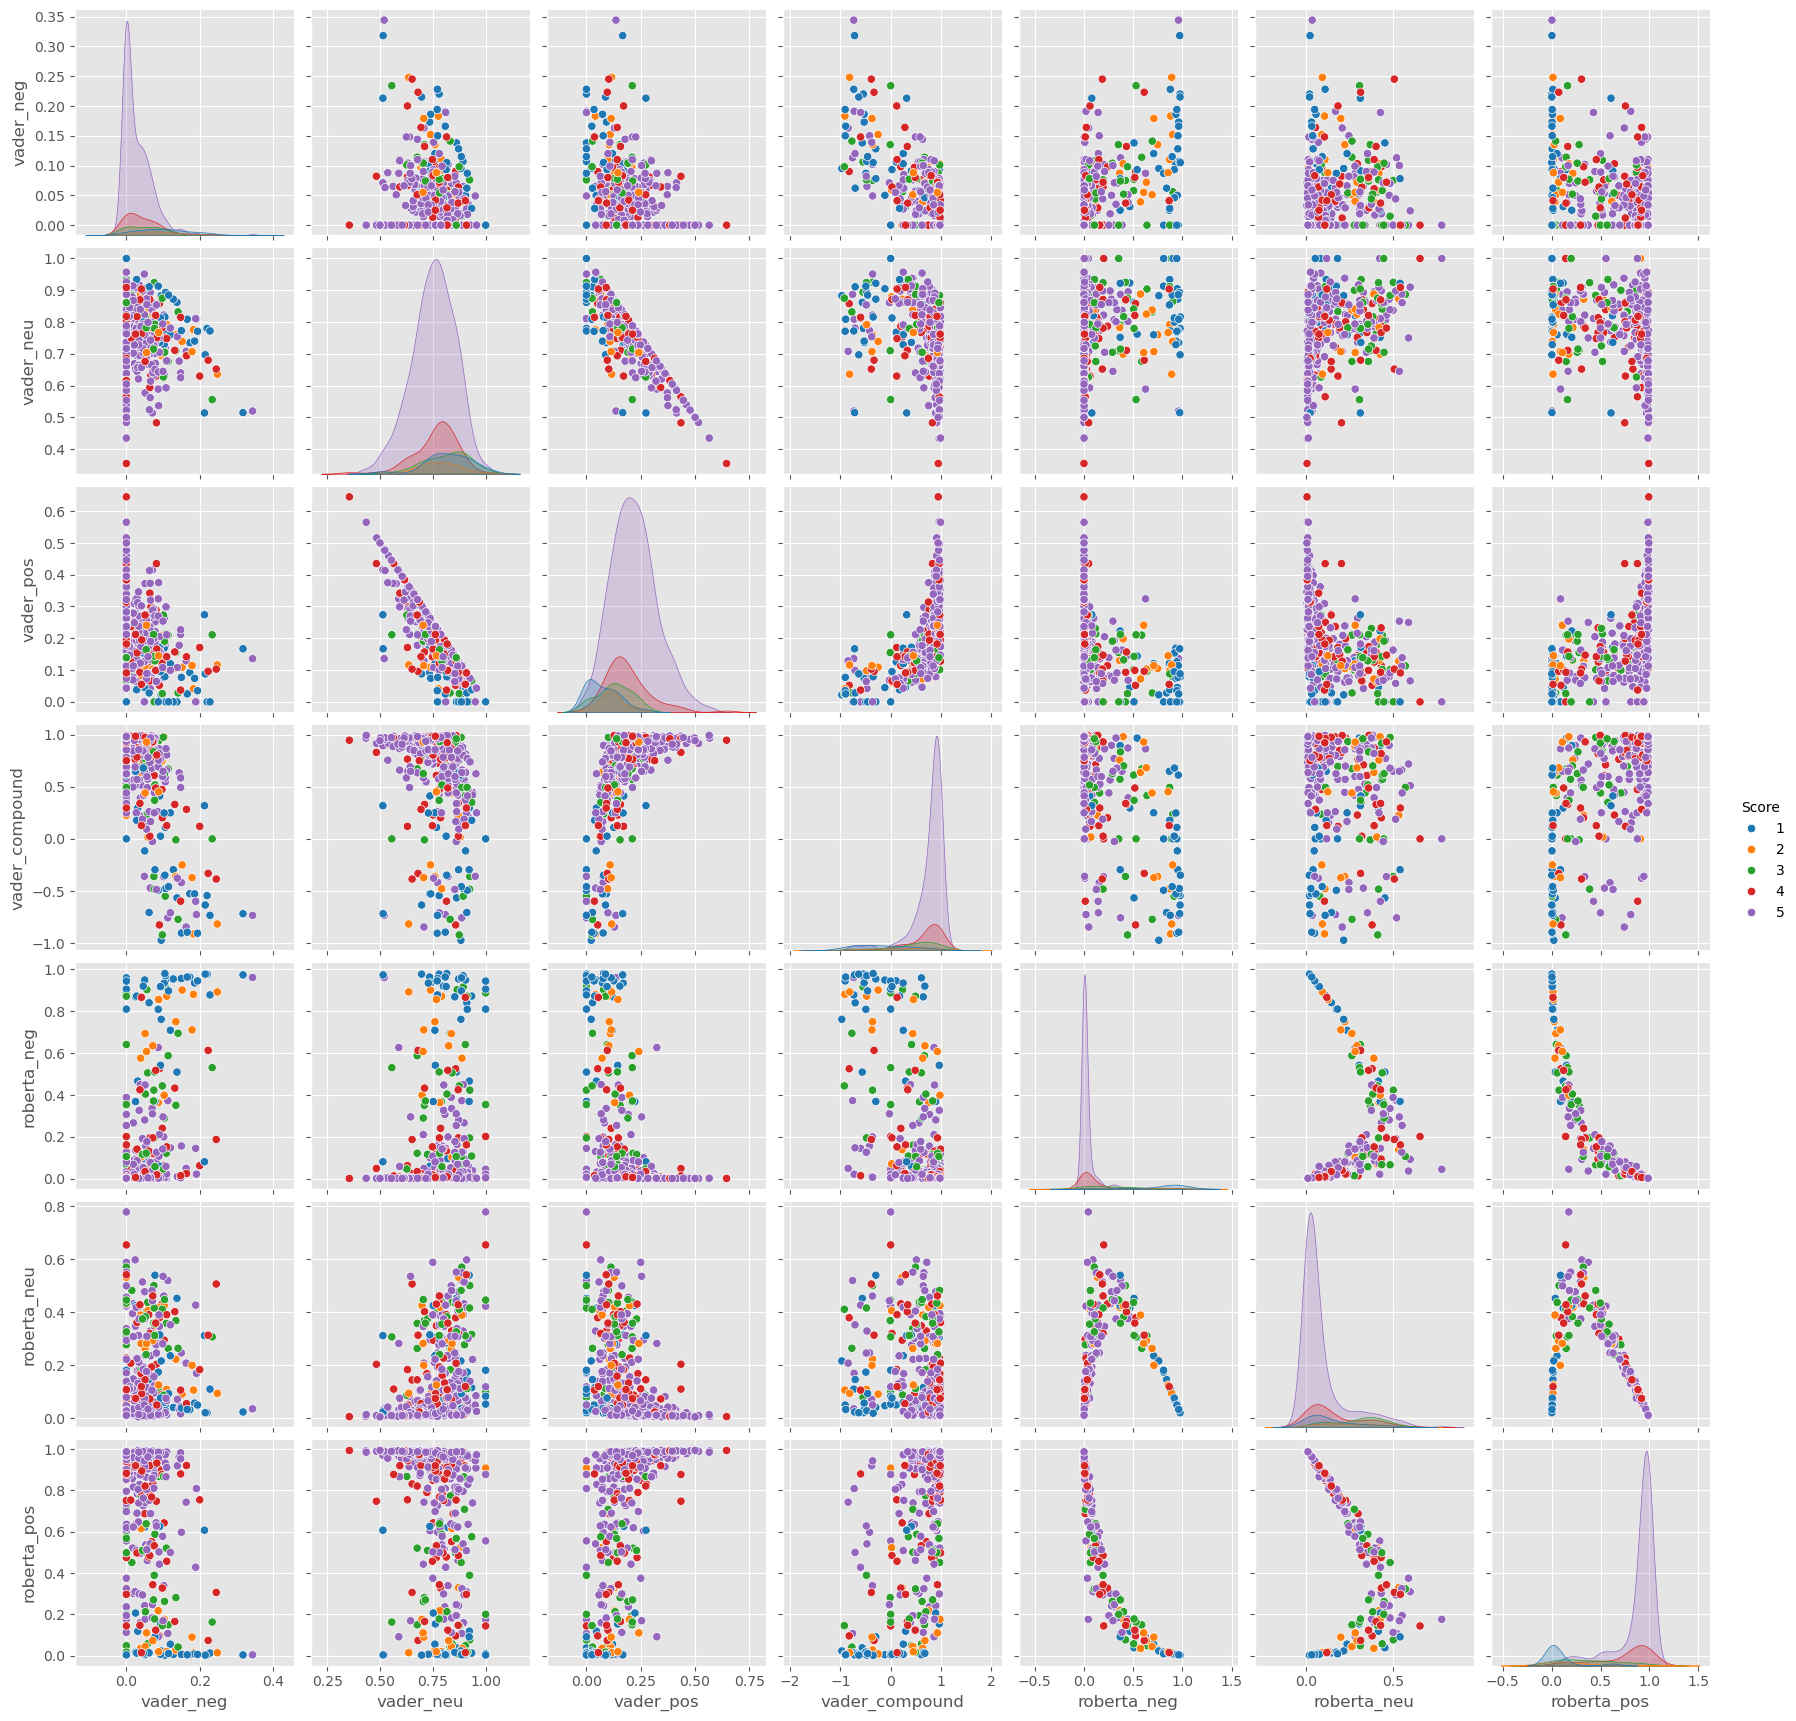

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10'
             )

plt.show()

## Paso 5: Revisar Ejemplos
Reseñas Positivas de 1 Estrella y Negativas de 5 Estrellas

Veamos algunos ejemplos donde las puntuaciones del modelo y las calificaciones de las reseñas difieren más.

Esta versión es más clara y mantiene la idea de contrastar las reseñas con los resultados del modelo.

In [33]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [34]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

## Reseña de 5 Estrellas con Sentimiento Negativo

In [35]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending= False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [36]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending= False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: El Pipeline de Transformers

Una forma rápida y sencilla de realizar predicciones de sentimiento.


In [37]:
from transformers import pipeline

# Crear un pipeline para análisis de sentimientos
sent_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [38]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [39]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [40]:
sent_pipeline('See you again soon!')

[{'label': 'POSITIVE', 'score': 0.9998476505279541}]

📝Conclusión

Este proyecto ha explorado el uso de modelos de procesamiento de lenguaje natural (NLP) para realizar análisis de sentimientos en textos. Se utilizaron dos enfoques principales: el modelo de análisis de sentimientos basado en VADER y el modelo RoBERTa preentrenado para clasificación de secuencias. A través de la comparación de los resultados de ambos modelos, se evidenció cómo las distintas metodologías pueden ofrecer percepciones complementarias sobre las opiniones expresadas en los textos. Además, se mostró cómo la integración de pipelines de Transformers facilita la implementación rápida de análisis de sentimientos, lo que potencia el desarrollo de aplicaciones más eficientes en la evaluación automática de opiniones y reseñas.

## ¡Y eso es todo! ¡Gracias por leer!